# Warning: if you use Colab

If you run on Colab, you need to install tensorflow v 2.1.0 and keract beforehand.

In [1]:
!pip uninstall tensorflow

Uninstalling tensorflow-2.2.0rc1:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.2.0rc1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.2.0rc1
y


In [2]:
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 43kB/s 
     |████████████████████████████████| 450kB 29.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=2a7755d41e9939d506812df451bbf6137a4dc8c5941e00bef1c890cb861add9f
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3


In [3]:
!pip install keract

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os 
os.chdir('/content/drive/My Drive/MVA/S2/DLMI')

# Imports

In [0]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import tensorflow_addons as tfa
import keract
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix,recall_score,accuracy_score,precision_score
import keras
import tensorflow as tf
from utils.evaluation import *
from utils.utils import read_dataset,split_dataset,visualize_transplant

# 1. Data importation and visualization

In [0]:
xtrain,ytrain,xval,yval,y_val_true,xtest,ytest,y_test_true,cols = np.load('data/transplant_10col.npy',
                                                                          allow_pickle=True)

In [9]:
xtrain.shape,xtest.shape

((264, 1082, 10), (33, 1082, 10))

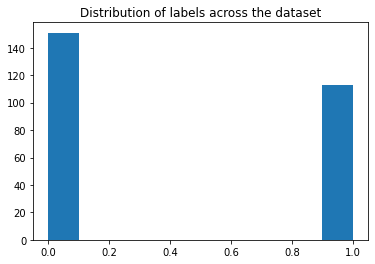

In [10]:
plt.hist(ytrain)
plt.title('Distribution of labels across the dataset')
plt.show()

In [11]:
unique_labels,props = np.unique(ytrain,return_counts=True)
df_props = pd.DataFrame([],columns=['proportion'],index = unique_labels)
df_props.index.name='label'
df_props['proportion'] = props/np.sum(props)
df_props

,proportion
label,
0,0.57197
1,0.42803


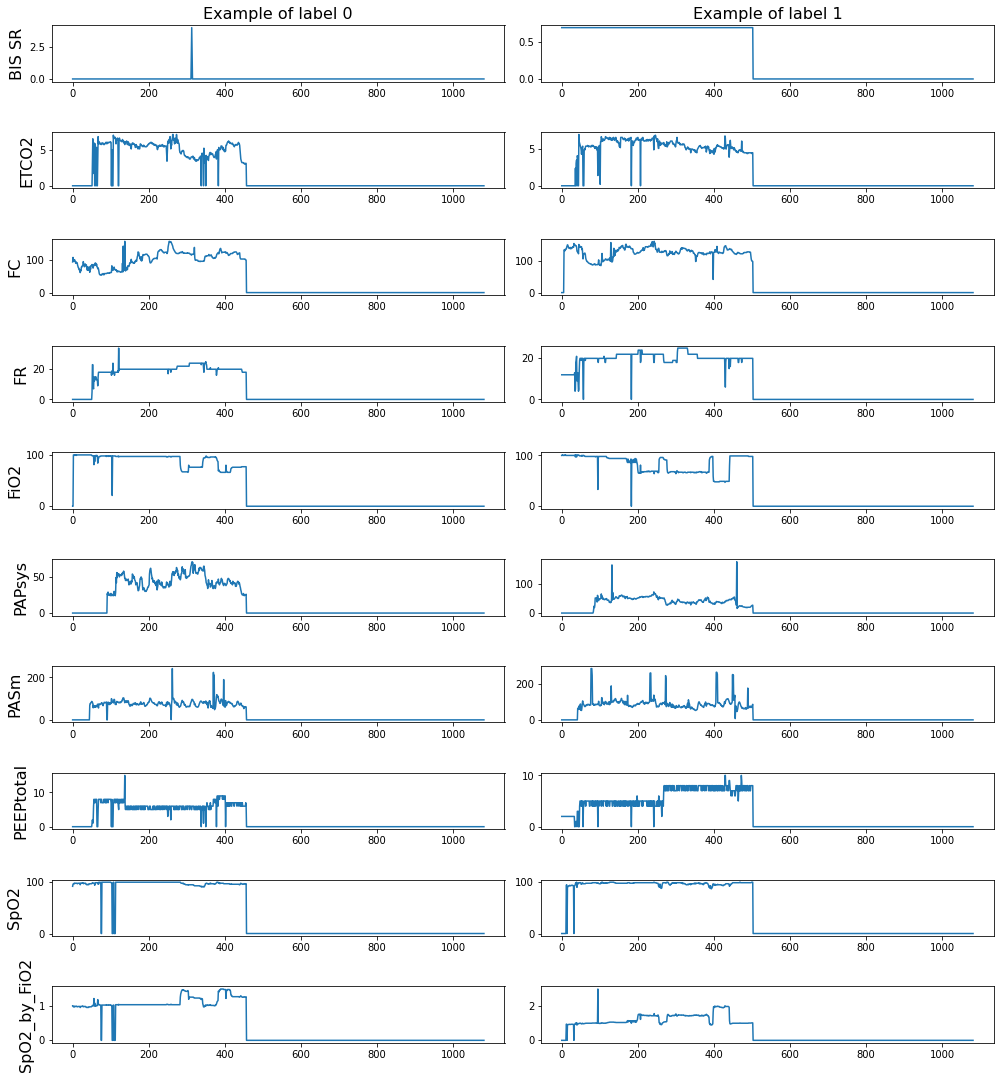

In [14]:
visualize_transplant(xtrain,ytrain,cols)

# 2. Splitting dataset

Our dataset has already been splitted using a stratified shuffle split, to respect the labels distribution.

# 3. Testing models

## 3.1 MLP

In [0]:
from models.mlp import Classifier_MLP

### 3.1.1 Training

In [39]:
mlp = Classifier_MLP(output_directory='outputs/output_mlp/',input_shape=(xtrain.shape[1],xtrain.shape[2]),
                     nb_classes = 2,verbose=True,
                     hidden_layers_size=(500,500,500))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 10820)             0         
_________________________________________________________________
dropout (Dropout)            (None, 10820)             0         
_________________________________________________________________
dense (Dense)                (None, 500)               5410500   
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               2

Train on 264 samples, validate on 33 samples
Epoch 1/100
264/264 [==============================] - 1s 4ms/sample - loss: 8.7221 - accuracy: 0.4280 - val_loss: 8.7799 - val_accuracy: 0.4242
Epoch 2/100
264/264 [==============================] - 0s 397us/sample - loss: 8.7221 - accuracy: 0.4280 - val_loss: 8.7799 - val_accuracy: 0.4242
Epoch 3/100
264/264 [==============================] - 0s 309us/sample - loss: 8.7221 - accuracy: 0.4280 - val_loss: 8.7799 - val_accuracy: 0.4242
Epoch 4/100
264/264 [==============================] - 0s 331us/sample - loss: 8.7221 - accuracy: 0.4280 - val_loss: 8.7799 - val_accuracy: 0.4242
Epoch 5/100
264/264 [==============================] - 0s 359us/sample - loss: 8.7221 - accuracy: 0.4280 - val_loss: 8.7799 - val_accuracy: 0.4242
Epoch 6/100
264/264 [==============================] - 0s 339us/sample - loss: 8.7221 - accuracy: 0.4280 - val_loss: 8.7799 - val_accuracy: 0.4242
Epoch 7/100
264/264 [==============================] - 2s 6ms/sample - loss

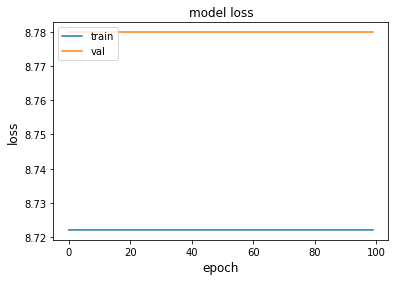

In [40]:
%matplotlib inline
hist = mlp.fit(xtrain,ytrain,xval,yval,y_val_true,batch_size=16,nb_epochs=100)

Let's evaluate our predictions on the validation set: 

In [0]:
mlp_model = tf.keras.models.load_model('outputs/output_mlp/best_model.hdf5')

In [42]:
ypred = mlp_model.predict(xval)
ypred = np.argmax(ypred,axis=1)
evaluate(y_val_true,ypred)

,accuracy,recall,precision,f1-score
0,0.575758,0.5,0.287879,0.365385


### 3.1.2 Evaluating on the test set

In [0]:
mlp_model = tf.keras.models.load_model('outputs/output_mlp/best_model.hdf5')

In [43]:
ypred = mlp_model.predict(xtest)
ypred = np.argmax(ypred,axis=1)
evaluate(y_test_true,ypred)

,accuracy,recall,precision,f1-score
0,0.575758,0.5,0.287879,0.365385


Let's be more precise on each class. The following scores are computed considering each label against all the others.

In [44]:
get_binary_metrics(y_test_true,ypred)

,recall,precision,f1-score
0,1,0.575758,0.730769
1,0,0,0


/content/drive/My Drive/MVA/S2/DLMI/utils/evaluation.py:36: RuntimeWarning: invalid value encountered in true_divide
  cm = np.round(cm/cm.sum(axis=0),3)


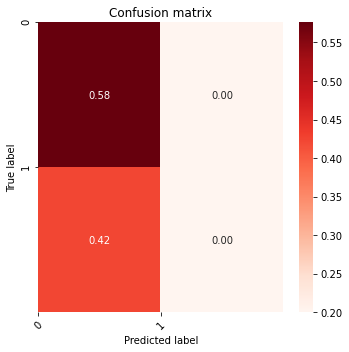

In [45]:
plot_confusion_matrix(y_test_true,ypred)

## 3.2 CNN

In [0]:
from models.CNN_1D import Classifier_1DCNN

### 3.2.1 Training

In [56]:
cnn = Classifier_1DCNN('outputs/output_1DCNN/', nb_classes=2,
                       n_conv_block=2, n_filters=(50,50,50), kern_size=(3,3,3), 
                       n_stride=(1,1), 
                       input_shape=(xtrain.shape[1],xtrain.shape[2]), 
                       add_FC=True, n_unit_FC=20,
                       verbose=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1082, 50)          1550      
_________________________________________________________________
batch_normalization (BatchNo (None, 1082, 50)          200       
_________________________________________________________________
activation (Activation)      (None, 1082, 50)          0         
_________________________________________________________________
dropout (Dropout)            (None, 1082, 50)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1082, 50)          7550      
_________________________________________________________________
batch_normalization_1 (Batch (None, 1082, 50)          200       
_________________________________________________________________
activation_1 (Activation)    (None, 1082, 50)          0

Train on 264 samples, validate on 33 samples
Epoch 1/25
264/264 [==============================] - 3s 11ms/sample - loss: 8.7221 - accuracy: 0.4280 - val_loss: 8.7799 - val_accuracy: 0.4242
Epoch 2/25
264/264 [==============================] - 0s 420us/sample - loss: 8.7221 - accuracy: 0.4280 - val_loss: 8.7799 - val_accuracy: 0.4242
Epoch 3/25
264/264 [==============================] - 0s 422us/sample - loss: 8.7221 - accuracy: 0.4280 - val_loss: 8.7799 - val_accuracy: 0.4242
Epoch 4/25
264/264 [==============================] - 0s 418us/sample - loss: 8.7221 - accuracy: 0.4280 - val_loss: 8.7799 - val_accuracy: 0.4242
Epoch 5/25
264/264 [==============================] - 0s 408us/sample - loss: 8.7221 - accuracy: 0.4280 - val_loss: 8.7799 - val_accuracy: 0.4242
Epoch 6/25
264/264 [==============================] - 0s 477us/sample - loss: 8.7221 - accuracy: 0.4280 - val_loss: 8.7799 - val_accuracy: 0.4242
Epoch 7/25
264/264 [==============================] - 0s 402us/sample - loss: 8.

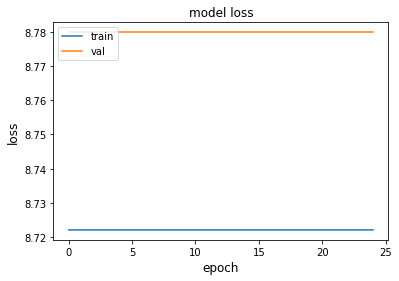

In [57]:
%matplotlib inline
hist = cnn.fit(xtrain,ytrain,xval,yval,y_val_true,batch_size=32,nb_epochs=25)

In [0]:
cnn_model = tf.keras.models.load_model('outputs/output_1DCNN/best_model.hdf5',
                                       custom_objects={'SWA': tfa.optimizers.SWA})

In [61]:
ypred = cnn_model.predict(xval)
ypred = np.argmax(ypred,axis=1)
evaluate(y_val_true,ypred)

,accuracy,recall,precision,f1-score
0,0.575758,0.5,0.287879,0.365385


### 3.2.2 Evaluating on the test set

In [0]:
cnn_model = tf.keras.models.load_model('outputs/output_1DCNN/best_model.hdf5',
                                       custom_objects={'SWA': tfa.optimizers.SWA})

In [62]:
ypred = cnn_model.predict(xtest)
ypred = np.argmax(ypred,axis=1)
evaluate(y_test_true,ypred)

,accuracy,recall,precision,f1-score
0,0.575758,0.5,0.287879,0.365385


Let's be more precise

In [63]:
get_binary_metrics(y_test_true,ypred)

,recall,precision,f1-score
0,1,0.575758,0.730769
1,0,0,0


/content/drive/My Drive/MVA/S2/DLMI/utils/evaluation.py:36: RuntimeWarning: invalid value encountered in true_divide
  cm = np.round(cm/cm.sum(axis=0),3)


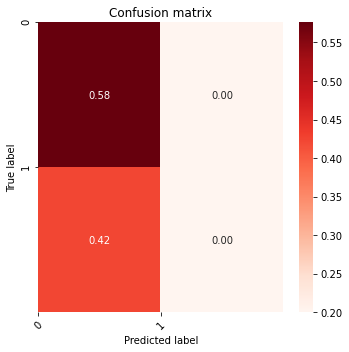

In [64]:
plot_confusion_matrix(y_test_true,ypred)

## 3.3 ResNet

In [0]:
from models.resnet import Classifier_RESNET

### 3.3.1 Training

In [67]:
resnet = Classifier_RESNET('outputs/output_resnet/',input_shape=(xtrain.shape[1],xtrain.shape[2]),
                           nb_classes=2,n_feature_maps = (50,100,100),kernel_size=(8,5,3,2),
                           verbose=1)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1082, 10)]   0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 1082, 50)     4050        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 1082, 50)     200         conv1d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 1082, 50)     0           batch_normalization[0][0]        
______________________________________________________________________________________________

Train on 264 samples, validate on 33 samples
Epoch 1/25
264/264 [==============================] - 4s 15ms/sample - loss: 8.7221 - accuracy: 0.4280 - val_loss: 8.7799 - val_accuracy: 0.4242
Epoch 2/25
264/264 [==============================] - 0s 1ms/sample - loss: 8.7221 - accuracy: 0.4280 - val_loss: 8.7799 - val_accuracy: 0.4242
Epoch 3/25
264/264 [==============================] - 1s 2ms/sample - loss: 8.7221 - accuracy: 0.4280 - val_loss: 8.7799 - val_accuracy: 0.4242
Epoch 4/25
264/264 [==============================] - 0s 1ms/sample - loss: 8.7221 - accuracy: 0.4280 - val_loss: 8.7799 - val_accuracy: 0.4242
Epoch 5/25
264/264 [==============================] - 0s 1ms/sample - loss: 8.7221 - accuracy: 0.4280 - val_loss: 8.7799 - val_accuracy: 0.4242
Epoch 6/25
264/264 [==============================] - 0s 1ms/sample - loss: 8.7221 - accuracy: 0.4280 - val_loss: 8.7799 - val_accuracy: 0.4242
Epoch 7/25
264/264 [==============================] - 0s 1ms/sample - loss: 8.7221 - accur

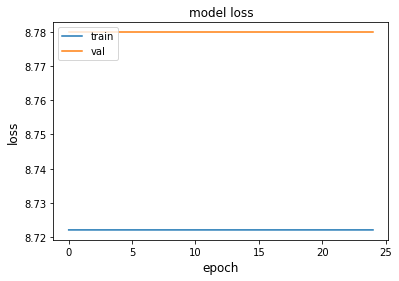

In [68]:
%matplotlib inline
hist = resnet.fit(xtrain,ytrain,xval,yval,y_val_true,batch_size=32,nb_epochs=25)

In [0]:
resnet_model = tf.keras.models.load_model('outputs/output_resnet/best_model.hdf5')

In [0]:
ypred = resnet_model.predict(xval)
ypred = np.argmax(ypred,axis=1)
evaluate(y_val_true,ypred)

,accuracy,recall,precision,f1-score
0,0.98144,0.87947,0.937338,0.903495


### 3.3.2 Evaluating on the test set

In [0]:
resnet_model = tf.keras.models.load_model('outputs/output_resnet/best_model.hdf5')

In [0]:
ypred = resnet_model.predict(xtest)
ypred = np.argmax(ypred,axis=1)
evaluate(y_test_true,ypred)

,accuracy,recall,precision,f1-score
0,0.982068,0.895614,0.949049,0.91974


In [0]:
get_binary_metrics(y_test_true,ypred)

,recall,precision,f1-score
0,0.993308,0.986976,0.990132
1,0.793258,0.813364,0.803185
2,0.927398,0.976342,0.951241
3,0.773438,0.980198,0.864629
4,0.990669,0.988363,0.989515


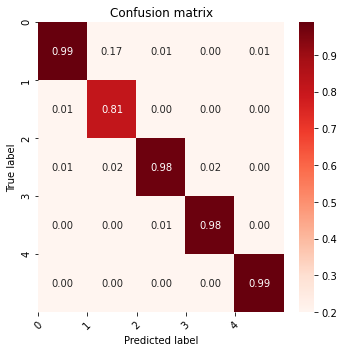

In [0]:
plot_confusion_matrix(y_test_true,ypred)

# 4. Interpreting models

In [0]:
from interpretation.cam import display_conv_activations

## 4.1 1D-CNN model

In [0]:
cnn_model = tf.keras.models.load_model('outputs/output_1DCNN/best_model.hdf5',
                                       custom_objects={'SWA': tfa.optimizers.SWA})

Let's focus on samples which were not classified as normal by our model.

In [0]:
ypred = np.argmax(cnn_model.predict(xtest),axis=1)
not_normal = []
for i in range(len(ypred)):
    if not ypred[i]==0: 
        not_normal.append(i)

In [0]:
%matplotlib inline
display_conv_activations(cnn_model,xtest[not_normal[0]])

ValueError: ignored

## 4.2 ResNet model

In [0]:
resnet_model = tf.keras.models.load_model('outputs/output_resnet/best_model.hdf5')

In [0]:
ypred = np.argmax(resnet_model.predict(xtest),axis=1)
not_normal = []
for i in range(len(ypred)):
    if not ypred[i]==0: 
        not_normal.append(i)

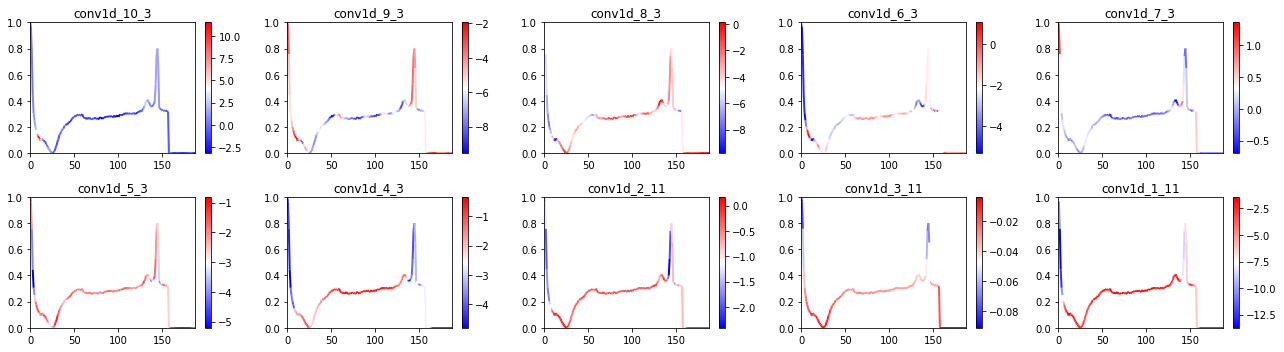

In [0]:
display_conv_activations(resnet_model,xtest[not_normal[0]])

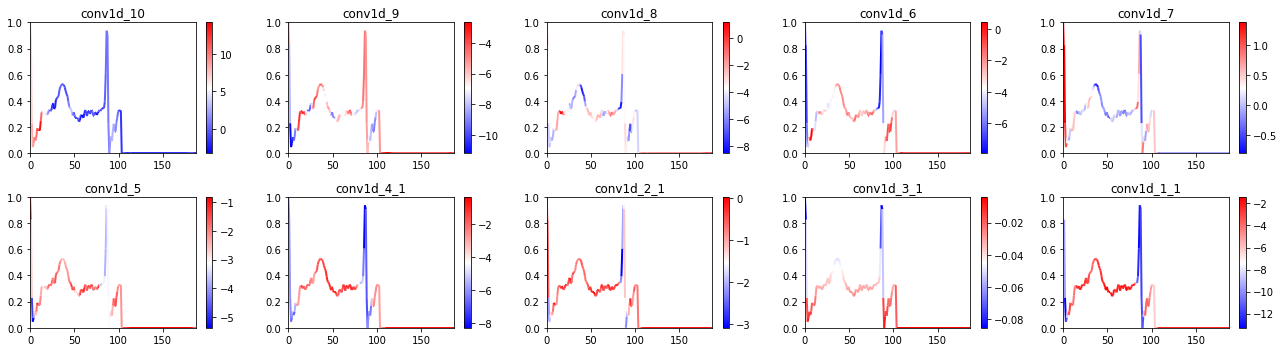

In [0]:
display_conv_activations(resnet_model,xtest[not_normal[1]])